In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from datetime import datetime

In [ ]:
# Load datasets
disease_data_path = "/content/drive/MyDrive/SSIP 2025 - AI-Powered Predictive Analytics for Disease Surveillance & Outbreak Management/Disease Outbreak Prediction/Ahemdabad _Disease_Data.csv"
hospital_data_path = "/content/drive/MyDrive/SSIP 2025 - AI-Powered Predictive Analytics for Disease Surveillance & Outbreak Management/Disease Outbreak Prediction/Ahemdabad_Hospital_Data.csv"

disease_df = pd.read_csv(disease_data_path)
hospital_df = pd.read_csv(hospital_data_path)

In [ ]:
disease_df.isna().sum()
# hospital_df.isna().sum()

,0
Date Recorded,0
Disease ID,0
Hospital ID,0
Disease Name,0
Disease Description,0
Disease Symptoms,0
Mild Cases,0
Moderate Cases,0
Severe Cases,0
Total Cases,0


In [ ]:
disease_df.isna().sum()

,0
Date Recorded,0
Disease ID,0
Hospital ID,0
Disease Name,0
Disease Description,0
Disease Symptoms,0
Mild Cases,0
Moderate Cases,0
Severe Cases,0
Total Cases,0


In [ ]:
# ------------------------------
# 3. Encoding Categorical Features
# ------------------------------
label_enc = LabelEncoder()

# Encoding categorical columns
disease_df['Disease Name'] = label_enc.fit_transform(disease_df['Disease Name'])
disease_df['Hotspot Area from Specific District'] = label_enc.fit_transform(disease_df['Hotspot Area from Specific District'])
disease_df['Seasonal Pattern'] = label_enc.fit_transform(disease_df['Seasonal Pattern'])

In [ ]:
# ------------------------------
# 4. Feature Scaling
# ------------------------------
scaler = MinMaxScaler()
num_cols = ['Total Cases', 'Active Cases', 'ICU Utilization', 'Recovery Rate', 'Mortality Rate']
disease_df[num_cols] = scaler.fit_transform(disease_df[num_cols])


In [ ]:
# ------------------------------
# 5. Creating New Features
# ------------------------------
# Case Severity Index (Weighted sum of cases based on severity)
disease_df['Case Severity Index'] = (disease_df['Mild Cases'] * 1 +
                                     disease_df['Moderate Cases'] * 2 +
                                     disease_df['Severe Cases'] * 3)

# Hospital Resource Load Indicator
disease_df['Resource Load'] = (disease_df['ICU Utilization'] +
                               disease_df['Occupied Ventilators'] +
                               disease_df['Occupied Oxygen']) / 3

# Outbreak Risk Factor (Considering cases and severity index)
disease_df['Outbreak Risk Factor'] = disease_df['Total Cases'] * disease_df['Case Severity Index']

In [ ]:
print("Unique Hospital IDs in disease_df:", disease_df['Hospital ID'].unique())
print("Unique Hospital IDs in hospital_df:", hospital_df['Hospital ID'].unique())

Unique Hospital IDs in disease_df: ['H001' 'H002' 'H003' 'H004' 'H005']
Unique Hospital IDs in hospital_df: ['H001' 'H002' 'H003' 'H004' 'H005']


In [ ]:
# ------------------------------
# 6. Merging Disease & Hospital Data
# ------------------------------
print("disease_df columns:", disease_df.columns)
print("hospital_df columns:", hospital_df.columns)
# Merge datasets using Hospital ID
final_df = disease_df.merge(hospital_df, on='Hospital ID', how='left')

# Display processed dataset
print(final_df.head())

disease_df columns: Index(['Date Recorded', 'Disease ID', 'Hospital ID', 'Disease Name',
       'Disease Description', 'Disease Symptoms', 'Mild Cases',
       'Moderate Cases', 'Severe Cases', 'Total Cases', 'Active Cases',
       'Hotspot Area from Specific District', 'Type', 'Recovery Rate',
       'Deaths', 'Occupied Beds', 'Occupied Ventilators', 'Occupied Oxygen',
       'Isolation Ward Status', 'Oxygen Supply Status', 'PPE Availability',
       'Mortality Rate', 'Vaccinated Coverage', 'Symptom Severity',
       'Seasonal Pattern', 'Emergency Admission Rate', 'ICU Utilization',
       'Case Severity Index', 'Resource Load', 'Outbreak Risk Factor'],
      dtype='object')
hospital_df columns: Index(['Hospital ID', 'Hospital Name', 'Hospital Registration Number',
       'Hospital Email ID', 'Hospital Password', 'Hospital Confirm Password',
       'Hospital Phone Number', 'Hospital District', 'Hospital Address',
       'Total Beds in Hospital', 'Total Ventilator in Hospital',
       

In [ ]:
final_df.isna().sum()

,0
Date Recorded,0
Disease ID,0
Hospital ID,0
Disease Name,0
Disease Description,0
Disease Symptoms,0
Mild Cases,0
Moderate Cases,0
Severe Cases,0
Total Cases,0


In [ ]:
# List of columns to keep
column = [
    'Date Recorded',
    'Total Cases', 'Active Cases', 'Mild Cases', 'Moderate Cases', 'Severe Cases',
    'Mortality Rate', 'Recovery Rate', 'Outbreak Risk Factor', 'Occupied Beds', 'Occupied Ventilators', 'Occupied Oxygen',
    'Total ICU Beds in Hospital', 'ICU Utilization', 'Emergency Admission Rate', 'Resource Load'
]

# Select only the required columns
finalized_df = final_df[column]

# Verify the changes
print(finalized_df.head())

  Date Recorded  Total Cases  Active Cases  Mild Cases  Moderate Cases  \
0    01-01-2024           19             9          14               4   
1    01-01-2024           35             3          29               4   
2    01-01-2024           35             7          27               6   
3    01-01-2024           46            25          26              18   
4    01-01-2024           33             7           9              19   

   Severe Cases  Mortality Rate  Recovery Rate  Outbreak Risk Factor  \
0             1               9             64                   475   
1             2               2             84                  1505   
2             2               7             88                  1575   
3             2               6             67                  3128   
4             5               6             87                  2046   

   Occupied Beds  Occupied Ventilators  Occupied Oxygen  \
0              3                     1              650   
1   

In [ ]:
finalized_df.to_csv("/content/drive/MyDrive/SSIP 2025 - AI-Powered Predictive Analytics for Disease Surveillance & Outbreak Management/Disease Outbreak Prediction/Disease_Outbreak_Severity_Prediction.csv", index=False)

In [ ]:
finalized_df

,Date Recorded,Total Cases,Active Cases,Mild Cases,Moderate Cases,Severe Cases,Mortality Rate,Recovery Rate,Outbreak Risk Factor,Occupied Beds,Occupied Ventilators,Occupied Oxygen,Total ICU Beds in Hospital,ICU Utilization,Emergency Admission Rate,Resource Load
0,01-01-2024,19,9,14,4,1,9,64,475,3,1,650,137,7,7,219.333333
1,01-01-2024,35,3,29,4,2,2,84,1505,2,2,1644,137,6,5,550.666667
2,01-01-2024,35,7,27,6,2,7,88,1575,7,2,919,137,9,3,310.000000
3,01-01-2024,46,25,26,18,2,6,67,3128,5,0,1842,137,6,2,616.000000
4,01-01-2024,33,7,9,19,5,6,87,2046,6,5,2565,137,6,7,858.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17595,15-03-2025,26,16,5,15,6,8,69,1378,21,3,5819,108,7,6,1943.000000
17596,15-03-2025,33,15,24,7,2,2,81,1452,7,0,1015,108,10,2,341.666667
17597,15-03-2025,36,26,27,3,6,2,63,1836,7,2,3799,108,7,8,1269.333333
17598,15-03-2025,31,8,6,19,6,1,67,1922,20,5,3014,108,7,8,1008.666667


# EDA

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/SSIP 2025 - AI-Powered Predictive Analytics for Disease Surveillance & Outbreak Management/Disease Outbreak Prediction/Disease_Outbreak_Severity_Prediction.csv')

In [ ]:
# Convert 'Date Recorded' to datetime format
df['Date Recorded'] = pd.to_datetime(df['Date Recorded'], errors='coerce')

# Drop rows with missing date values
df = df.dropna(subset=['Date Recorded'])

In [ ]:
# Encoding categorical variables
if 'Seasonal Pattern' in df.columns:
    df['Seasonal Pattern'] = LabelEncoder().fit_transform(df['Seasonal Pattern'])

# Define features and target
features = ['Total Cases', 'Active Cases', 'Mild Cases', 'Moderate Cases', 'Severe Cases',
            'Mortality Rate', 'Recovery Rate','Occupied Beds',
            'Occupied Ventilators', 'Occupied Oxygen', 'Total ICU Beds in Hospital',
            'ICU Utilization', 'Emergency Admission Rate', 'Resource Load']

target = 'Outbreak Risk Factor'  # Adjust target based on actual prediction needs

X = df[features]
y = df[target]

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save preprocessed data
preprocessed_data = {
    'X_train': X_train_scaled,
    'X_test': X_test_scaled,
    'y_train': y_train,
    'y_test': y_test
}

# Display dataset info
print("Preprocessing Complete. Dataset Ready for Model Training.")

Preprocessing Complete. Dataset Ready for Model Training.


In [ ]:
import joblib
from sklearn.preprocessing import StandardScaler

# -------------------------------
# Fit and Save Scaler
# -------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit the scaler on training data
X_test_scaled = scaler.transform(X_test)  # Transform test data

# Define file name for saving scaler
scaler_filename = "/content/drive/MyDrive/SSIP 2025 - AI-Powered Predictive Analytics for Disease Surveillance & Outbreak Management/Disease Outbreak Prediction/scaler.pkl"

# Save the scaler
joblib.dump(scaler, scaler_filename)

print("✅ Scaler saved successfully!")

✅ Scaler saved successfully!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Training Random Forest...
Training Support Vector Regressor...
Training XGBoost...

Model Performance:
                                  MAE            MSE  R2 Score
Random Forest              19.106826     726.412699  0.999192
Support Vector Regressor  748.499442  867964.949512  0.034023
XGBoost                     9.531108     155.654282  0.999827


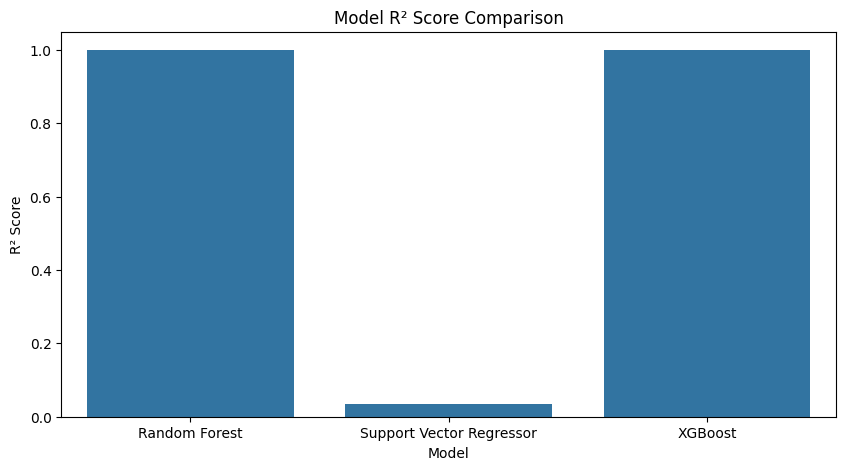

In [ ]:
# Define Models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor": SVR(kernel='rbf'),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Train and Evaluate Models
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate Performance
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MAE": mae, "MSE": mse, "R2 Score": r2}

# Display Results
results_df = pd.DataFrame(results).T
print("\nModel Performance:\n", results_df)

# Plot Model Performance
plt.figure(figsize=(10, 5))
sns.barplot(x=results_df.index, y=results_df["R2 Score"])
plt.title("Model R² Score Comparison")
plt.ylabel("R² Score")
plt.xlabel("Model")
plt.show()

In [ ]:
import joblib

# Define file names
random_forest_model_filename = "/content/drive/MyDrive/SSIP 2025 - AI-Powered Predictive Analytics for Disease Surveillance & Outbreak Management/Disease Outbreak Prediction/random_forest_model.pkl"
xgboost_model_filename = "/content/drive/MyDrive/SSIP 2025 - AI-Powered Predictive Analytics for Disease Surveillance & Outbreak Management/Disease Outbreak Prediction/xgboost_model.pkl"

# Save the trained models
# Accessing the models from the 'models' dictionary
joblib.dump(models["Random Forest"], random_forest_model_filename) # Accessing the 'Random Forest' model from the dictionary
joblib.dump(models["XGBoost"], xgboost_model_filename) # Accessing the 'XGBoost' model from the dictionary


print("Models saved successfully!")

Models saved successfully!


# Inference Code

In [ ]:
import pandas as pd
import numpy as np
import joblib

# -------------------------------
# Load the Trained Models
# -------------------------------
random_forest_model_filename = "/content/drive/MyDrive/SSIP 2025 - AI-Powered Predictive Analytics for Disease Surveillance & Outbreak Management/Disease Outbreak Prediction/random_forest_model.pkl"
xgboost_model_filename = "/content/drive/MyDrive/SSIP 2025 - AI-Powered Predictive Analytics for Disease Surveillance & Outbreak Management/Disease Outbreak Prediction/xgboost_model.pkl"

# Load models
random_forest_model = joblib.load(random_forest_model_filename)
xgboost_model = joblib.load(xgboost_model_filename)

# -------------------------------
# New Data Point for Prediction
# -------------------------------
# Example new data (Modify values accordingly)
new_data = pd.DataFrame({
    'Total Cases': [3040],
    'Active Cases': [500],
    'Mild Cases': [20000],
    'Moderate Cases': [800],
    'Severe Cases': [20000],
    'Mortality Rate': [2.0],
    'Recovery Rate': [55.0],
    # 'Outbreak Risk Factor': [500],  # If predicting outbreak severity, remove from input
    'Occupied Beds': [2000],
    'Occupied Ventilators': [50],
    'Occupied Oxygen': [10000],
    'Total ICU Beds in Hospital': [50],
    'ICU Utilization': [2000],
    'Emergency Admission Rate': [100],
    'Resource Load': [3000]
})

# -------------------------------
# Scale New Data (If Scaling was Used)
# -------------------------------
# Load the previously used scaler
scaler_filename = "/content/drive/MyDrive/SSIP 2025 - AI-Powered Predictive Analytics for Disease Surveillance & Outbreak Management/Disease Outbreak Prediction/scaler.pkl"
scaler = joblib.load(scaler_filename)

new_data_scaled = scaler.transform(new_data)

# -------------------------------
# Make Predictions
# -------------------------------
rf_prediction = random_forest_model.predict(new_data_scaled)[0]
xgb_prediction = xgboost_model.predict(new_data_scaled)[0]

# -------------------------------
# Display Predictions
# -------------------------------
print(f"🔹 Random Forest Prediction: {rf_prediction:.2f}")
# print(f"🔹 XGBoost Prediction: {xgb_prediction:.2f}")


🔹 Random Forest Prediction: 5248.01


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
import numpy as np

# Assuming 'y' contains the actual Outbreak Risk Factor values from the dataset
low_threshold = np.percentile(y, 25)    # 25th percentile (Low Risk)
moderate_threshold = np.percentile(y, 50)  # Median (Moderate Risk)
high_threshold = np.percentile(y, 75)   # 75th percentile (High Risk)
critical_threshold = np.max(y)  # Maximum value (Critical Risk)

print(f"Thresholds Set: \nLow Risk < {low_threshold}\nModerate Risk < {moderate_threshold}\nHigh Risk < {high_threshold}\nCritical Risk >= {high_threshold}")

Thresholds Set: 
Low Risk < 1161.0
Moderate Risk < 1782.0
High Risk < 2501.0
Critical Risk >= 2501.0


In [ ]:
def classify_outbreak_risk(prediction, low, moderate, high):
    if prediction < low:
        return "Low Risk"
    elif prediction < moderate:
        return "Moderate Risk"
    elif prediction < high:
        return "High Risk"
    else:
        return "Critical Risk"

# Example: Classifying the Random Forest Prediction (139.48)
prediction_value = 5248.01
risk_category = classify_outbreak_risk(prediction_value, low_threshold, moderate_threshold, high_threshold)

print(f"Predicted Outbreak Risk Factor: {prediction_value}")
print(f"Classified as: {risk_category}")

Predicted Outbreak Risk Factor: 5248.01
Classified as: Critical Risk
